# Load libraries

In [2]:
!pip install scanpy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 133.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
  Attempting uninstall: scanpy
    Found existing installation: scanpy 1.9.1
    Uninstalling scanpy-1.9.1:
      Successfully uninstalled scanpy-1.9.1
ERROR: pip's dependency resolver does n

In [3]:
!pip install harmonypy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip3 install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import harmonypy as hm
sc.settings.verbosity = 0

In [6]:
import GenKI as gk
from GenKI.preprocesing import build_adata
from GenKI.dataLoader import DataLoader
from GenKI.train import VGAE_trainer
from GenKI import utils

%load_ext autoreload
%autoreload 2

2025-07-18 13:21:07.175925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-18 13:21:11.179870: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-07-18 13:21:11.180117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Unlimited width
pd.set_option('display.max_rows', 100)  # Show 100 rows
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

In [3]:
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)

# Change the current directory
os.chdir('/home/jupyter/ExperimentOne/')

/home/jupyter/ExperimentOne/edit


# Load sc object and get info

In [4]:
# Source file: https://zenodo.org/records/13749348
adata = ad.read_h5ad("Input/32_human_adata.h5ad") # Preprocessed data
#adata = ad.read_h5ad("Input/portal_human_v1.5.h5ad") # Processed data
adata

AnnData object with n_obs × n_vars = 2323 × 62754
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine'
    layers: 'counts'

In [6]:
# Display the first n rows of observation metadata
display(adata.obs.head(10))
display(adata.var.head(10))

day       ct        experiment technology   n_counts  n_genes  ct_fine
index                                                                                        
ERX3015937_ERX3015937  5.0  Unknown  Meistermann_2021  SMARTSeq2   708313.0     5761  Unknown
ERX3015939_ERX3015939  5.0  Unknown  Meistermann_2021  SMARTSeq2   402557.0     5689  Unknown
ERX3015940_ERX3015940  5.0  Unknown  Meistermann_2021  SMARTSeq2   511338.0     6039  Unknown
ERX3015941_ERX3015941  5.0  Unknown  Meistermann_2021  SMARTSeq2   994383.0     8383  Unknown
ERX3015936_ERX3015936  5.0  Unknown  Meistermann_2021  SMARTSeq2  1389486.0     7762  Unknown
ERX3015943_ERX3015943  5.0  Unknown  Meistermann_2021  SMARTSeq2   450083.0     6262  Unknown
ERX3015935_ERX3015935  5.0  Unknown  Meistermann_2021  SMARTSeq2  1138287.0     7508  Unknown
ERX3015945_ERX3015945  5.0  Unknown  Meistermann_2021  SMARTSeq2  1018558.0     7304  Unknown
ERX3015938_ERX3015938  5.0  Unknown  Meistermann_2021  SMARTSeq2   929014.0     8695  Unknown
ERX3015947_ERX3015947  5.0  Unknown  Meistermann_2021  SMARTSeq2   847205.0     7949  Unknown

Empty DataFrame
Columns: []
Index: [ENSG00000279928, ENSG00000228037, ENSG00000142611, ENSG00000284616, ENSG00000157911, ENSG00000269896, ENSG00000228463, ENSG00000260972, ENSG00000224340, ENSG00000226374]

In [7]:
# Display unique values of each column
# For all columns in the obs DataFrame
for col in adata.obs.columns:
    unique_values = adata.obs[col].unique()
    print(f"\nColumn '{col}' has {len(unique_values)} unique values:")
    # If there are too many unique values, limit the display
    if len(unique_values) > 20:
        print(unique_values[:20], "... (showing first 20 of", len(unique_values), "values)")
    else:
        print(unique_values)


Column 'day' has 13 unique values:
[ 5.    6.    4.    3.    7.   10.    8.    9.    2.    1.25  0.    0.75
  0.33]

Column 'ct' has 12 unique values:
['Unknown', 'Trophectoderm', 'Inner Cell Mass', 'Primitive Endoderm', 'Epiblast', ..., '2C', 'Morula', 'Oocyte', 'Zygote', 'Pronucleus']
Length: 12
Categories (12, object): ['2C', '4C', '8C', 'Epiblast', ..., 'Pronucleus', 'Trophectoderm', 'Unknown', 'Zygote']

Column 'experiment' has 6 unique values:
['Meistermann_2021', 'Petropoulos_2016', 'Xiang_2020', 'Yan_2013', 'Yanagida_2021', 'Xue_2013']
Categories (6, object): ['Meistermann_2021', 'Petropoulos_2016', 'Xiang_2020', 'Xue_2013', 'Yan_2013', 'Yanagida_2021']

Column 'technology' has 3 unique values:
['SMARTSeq2', 'SMARTSeq', 'Tang2009']
Categories (3, object): ['SMARTSeq', 'SMARTSeq2', 'Tang2009']

Column 'n_counts' has 2323 unique values:
[ 708313.  402557.  511338.  994383. 1389486.  450083. 1138287. 1018558.
  929014.  847205. 1239916. 1228407. 1423939. 1292445.  421091.  720217

# Adjust some variables

In [8]:
# This adjustment is inherted from  https://github.com/brickmanlab/proks-salehin-et-al/blob/master/notebooks/02_human_integration.ipynb

adata.obs.experiment = adata.obs.experiment.str.replace('_', ' et al., ').astype('category')
adata.obs['batch'] = adata.obs.experiment

adata.obs['stage'] = adata.obs.ct.cat.rename_categories({
    'Epiblast': 'EPI',
    'Inner Cell Mass': 'ICM',
    'Primitive Endoderm': 'PrE',
    'Trophectoderm': 'TE'
}).cat.reorder_categories(['Oocyte', 'Pronucleus', 'Zygote', '2C', '4C', '8C', 'Morula', 'TE', 'ICM', 'EPI', 'PrE', 'Unknown'])

adata.obs['timepoint'] = adata.obs.ct.astype(str)
timepoint_mask = adata.obs.ct.isin(['Unknown', 'Trophectoderm', 'Inner Cell Mass', 'Primitive Endoderm', 'Epiblast'])
adata.obs.loc[timepoint_mask, 'timepoint'] = 'E' + adata.obs.loc[timepoint_mask, 'day'].astype(str)
adata.obs.ct = adata.obs.ct.astype('category')

In [9]:
# # This adjustment is inherted from  https://github.com/brickmanlab/proks-salehin-et-al/blob/master/notebooks/02_human_integration.ipynb

adata.obs['ct_orig'] = adata.obs.ct
adata.obs.ct = adata.obs.ct_fine

# Gene annotation by symbol

In [10]:
# Import dataset containing gene IDs and symbols from the original experiment
gene_ID_df = pd.read_csv('Input/deseq_KO_vs_uninjected_control.csv', 
                      index_col=0, sep= "\t")

gene_ID_df = gene_ID_df.reset_index()  # Convert current index (symbols) to a column
gene_ID_df = gene_ID_df.set_index('Ensembl') # Make gene ID as index
#display(gene_ID_df.head(5))

In [11]:
# Import dataset from HUGO database as double check
HUGO = pd.read_csv('Input/HUGO_symbols.txt', sep='\t', low_memory=False)
HUGO = HUGO.set_index('ensembl_gene_id')
#display(HUGO)

In [12]:
# Create dictionaries for both annotation sources
gene_dict_experimental = dict(zip(gene_ID_df.index, gene_ID_df['Gene']))
gene_dict_hugo = dict(zip(HUGO.index, HUGO['symbol']))

# Create prioritized annotation function
def get_prioritized_symbol(gene_id):
    # First try experimental data (gene_ID_df)
    if gene_id in gene_dict_experimental:
        return gene_dict_experimental[gene_id]
    # Then try HUGO
    elif gene_id in gene_dict_hugo:
        return gene_dict_hugo[gene_id]
    # Finally keep original Ensembl ID
    else:
        return gene_id

# Apply the prioritized mapping
adata.var['symbol'] = [get_prioritized_symbol(gene_id) for gene_id in adata.var_names]

In [13]:
#display(adata.var['symbol'].head(50))

In [14]:
# Make a copy of the current var names as 'ensembl_id'
adata.var['Ensembl'] = adata.var_names.copy()

# Now set the var_names to be the symbols
adata.var_names = adata.var['symbol']

In [15]:
# Make sure of target gene symbol
#adata.var[adata.var['Ensembl'] == 'ENSG00000204531']

# Or to get the data for that gene:
adata.var.loc['POU5F1'] if 'POU5F1' in adata.var_names else None

symbol              POU5F1
Ensembl    ENSG00000204531
Name: POU5F1, dtype: object

In [16]:
# Set the var_names_make_unique parameter
# This ensures all var names are unique if there are still duplicates
adata.var_names_make_unique()


In [17]:
# Specific Genes of interest
specific_genes =  [
    # Trophectoderm genes
    "GATA2", "TEAD3", "FABP3", "PPARG", "PLAC8", "CDX2", "DLX3", "HAND1", "SMAD7", "WNT7A",
    
    # Epiblast genes
    "ETS2", "POU5F1", "SOX2", "VENTX", "NANOG", "KLF17", "DPPA5", 
    "ETV4", "TDGF1", "GSC", "TP53", "TET1", "TET2", "IFITM1",
    
    # Primitive Endoderm genes
    "RSPO3", "COL4A2", "GATA4", "LAMA2", "COL4A1", "SOX17", "GATA6", "FOXA2", "BMP6",
    
    # Other genes
    "CTNNB1", "CDH1", "SPARC", "PAX6", "TGFBR1", "HHEX"
]

In [18]:
# Check which genes from your list are present
present_genes = [gene for gene in specific_genes if gene in adata.var_names]

# Get a boolean mask for all your genes
genes_mask = adata.var_names.isin(specific_genes)

# Get subset of data containing only these genes
adata_subset = adata[:, genes_mask]

# Print stats
print(f"Found {len(present_genes)} out of {len(specific_genes)} genes")
print(f"Missing genes: {set(specific_genes) - set(present_genes)}")

Found 39 out of 39 genes
Missing genes: set()


In [20]:
#display(adata.var.head(100))

# QC check

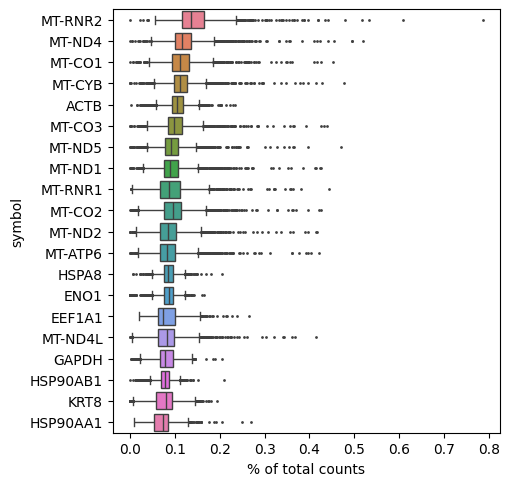

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20, show= False)
plt.savefig('Fig/Proks_top_genes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [20]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [21]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

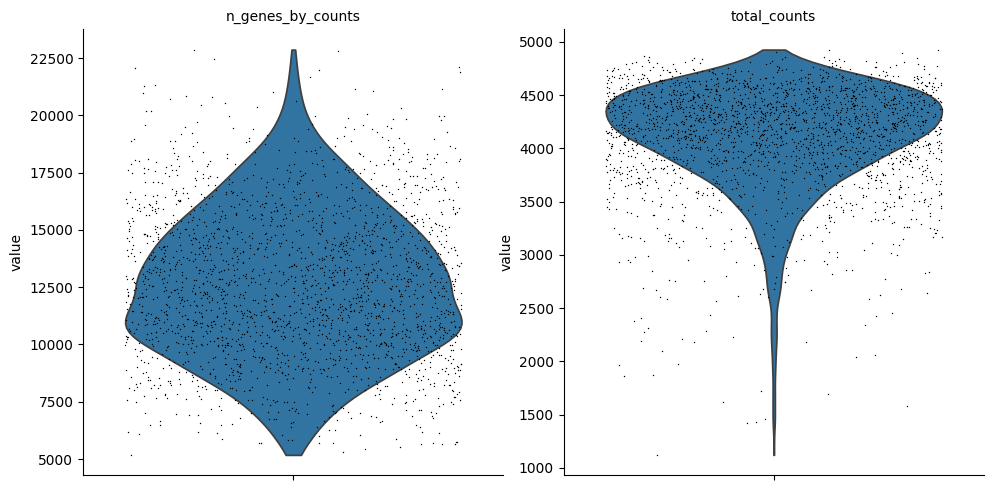

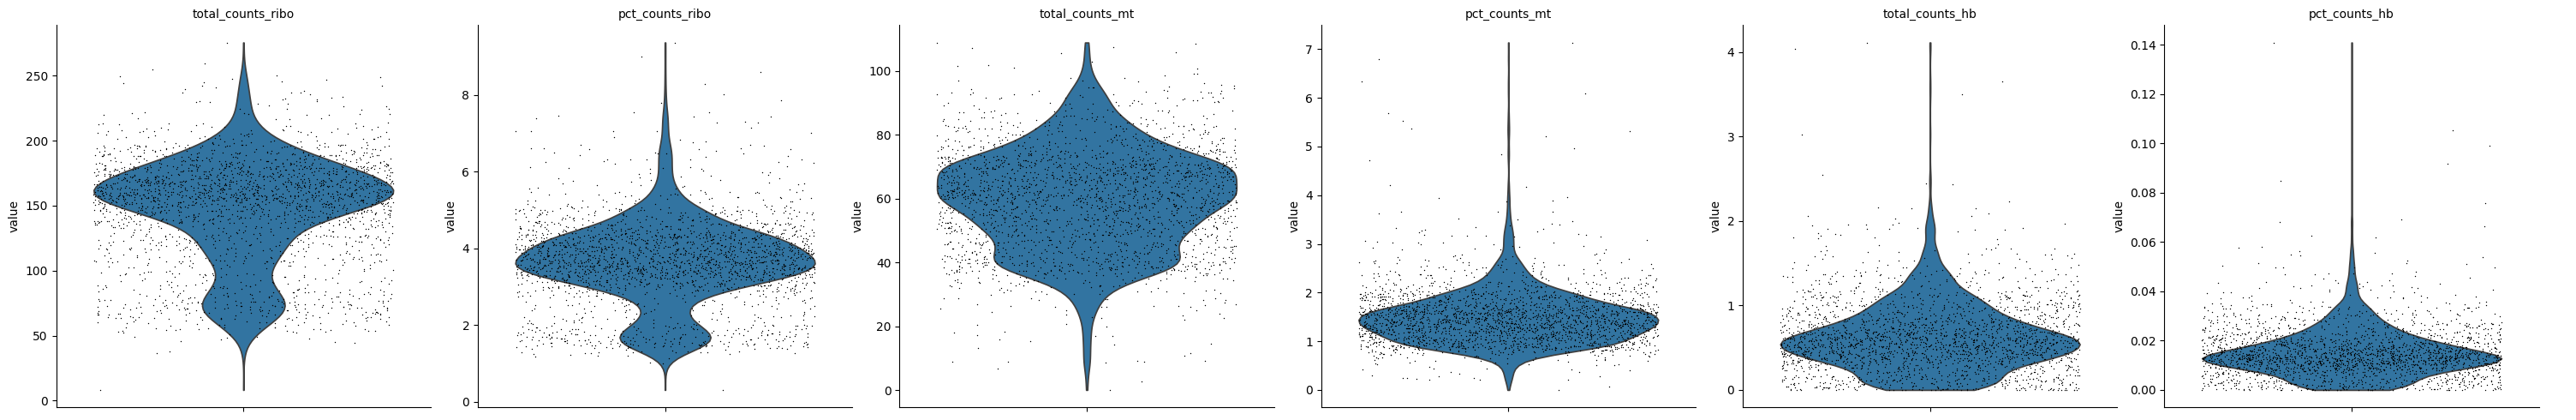

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata,
    ["total_counts_ribo", "pct_counts_ribo",
     "total_counts_mt","pct_counts_mt",
    "total_counts_hb", "pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
)

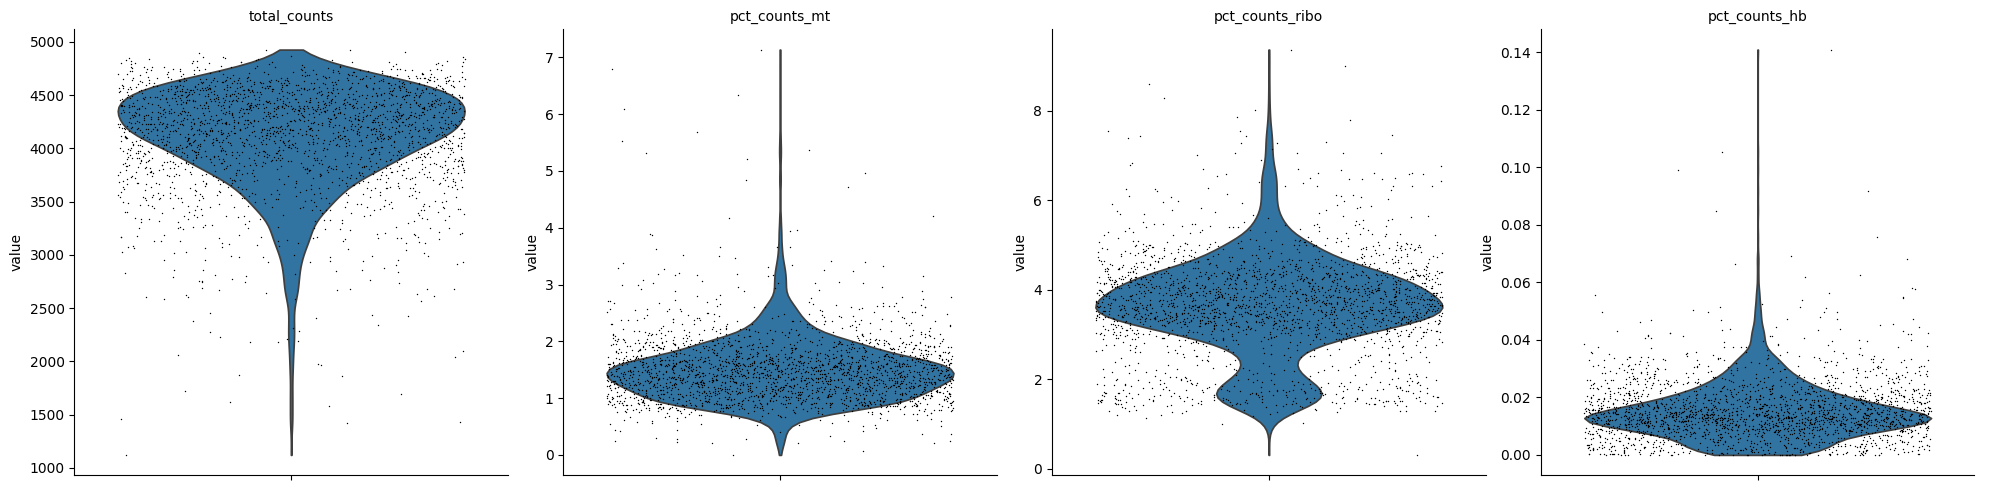

In [22]:
sc.pl.violin(
    adata,
    ["total_counts", "pct_counts_mt","pct_counts_ribo", "pct_counts_hb" ],
    jitter=0.4,
    multi_panel=True,
    show= False
)
plt.savefig('Fig/Proks_counts.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

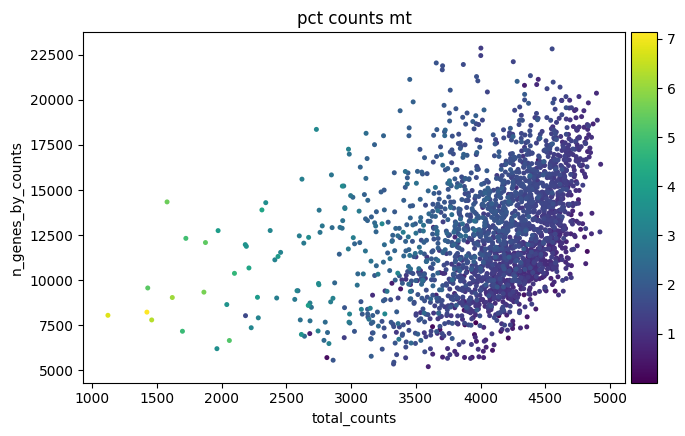

In [25]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

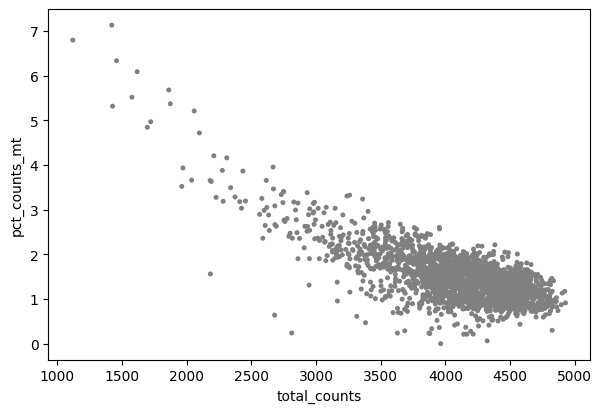

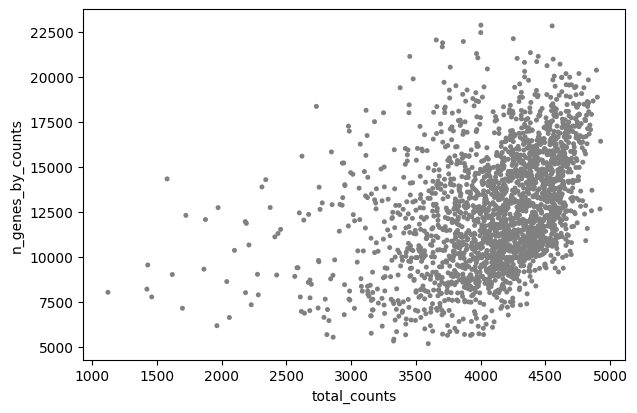

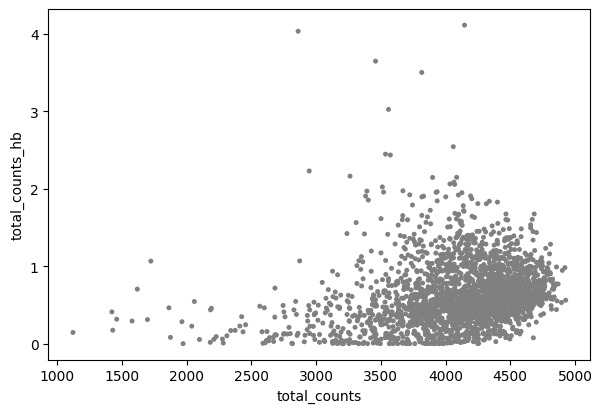

In [26]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")
sc.pl.scatter(adata, x="total_counts", y= "total_counts_hb")

In [23]:
# Determine cells with high mt genes
high_mt_cells = adata.obs[adata.obs['pct_counts_mt'] > 5].index
display(adata.obs.loc[high_mt_cells])

day                 ct                experiment technology    n_counts  n_genes            ct_fine                     batch    stage timepoint          ct_orig  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  log1p_total_counts  pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  log1p_total_counts_hb  pct_counts_hb
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
ERX1121114_ERX1121114  5.0            Unknown  Petropoulos et al., 2016  SMARTSeq2   1150946.0     8211            Unknown  Petropoulos et al., 2016  Unknown      E5.0          Unknown               8211                 9.013352   1422.594849            7.260941                   11.924038                    17.174332                    25.409902                    42.006129       101.506508               4.629926       7.135307          82.177612                 4.420978         5.776600         0.410370               0.343852       0.028847
ERX1121117_ERX1121117  5.0  Trophectoderm_5.0  Petropoulos et al., 2016  SMARTSeq2    935091.0     7777  Trophectoderm_5.0  Petropoulos et al., 2016       TE      E5.0    Trophectoderm               7777                 8.959055   1459.525635            7.286551                   11.085429                    15.684638                    22.769190                    37.507497        92.507553               4.538042       6.338193          60.268108                 4.115260         4.129294         0.315564               0.274266       0.021621
ERX1121208_ERX1121208  5.0    Inner Cell Mass  Petropoulos et al., 2016  SMARTSeq2    622546.0     6635    Inner Cell Mass  Petropoulos et al., 2016      ICM      E5.0  Inner Cell Mass               6635                 8.800265   2059.567871            7.630737                    8.362523                    12.572484                    19.421538                    34.791348       107.331459               4.685195       5.211358          80.047356                 4.395034         3.886609         0.543973               0.434359       0.026412
ERX1121301_ERX1121301  5.0            Unknown  Petropoulos et al., 2016  SMARTSeq2   3966005.0    12074            Unknown  Petropoulos et al., 2016  Unknown      E5.0          Unknown              12074                 9.398892   1874.900391            7.536844                    8.789968                    13.253502                    20.393397                    35.721474       100.754036               4.622559       5.373834          87.240387                 4.480065         4.653068         0.081193               0.078065       0.004331
ERX1121509_ERX1121509  6.0  Trophectoderm_6.0  Petropoulos et al., 2016  SMARTSeq2   1453583.0     9022  Trophectoderm_6.0  Petropoulos et al., 2016       TE      E6.0    Trophectoderm               9022                 9.107532   1618.742554            7.390022                   10.266582                    14.962585                    22.376263                    37.387888        98.615639               4.601319       6.092113         101.406517                 4.628950         6.264524         0.704423               0.533227       0.043517
ERX1121738_ERX1121738  6.0  Trophectoderm_6.0  Petropoulos et al., 2016  SMARTSeq2   1284858.0     8034  Trophectoderm_6.0  Petropoulos et al., 2016       TE      E6.0    Trophecto

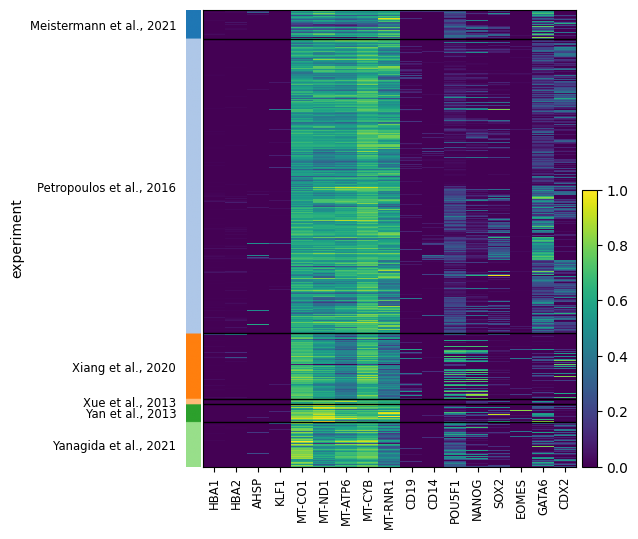

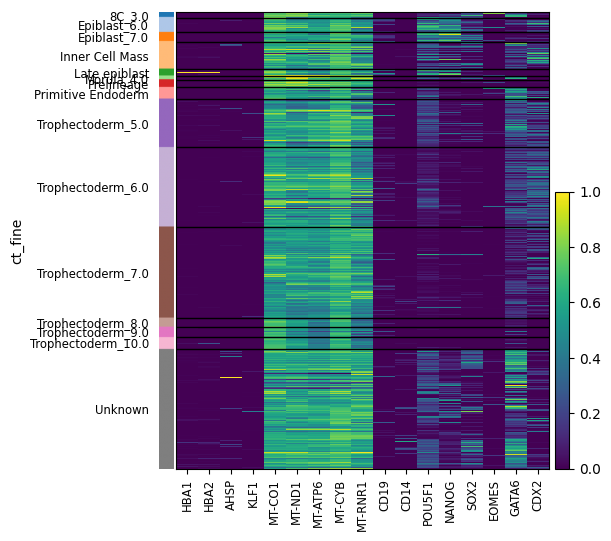

In [24]:
# Define marker genes for different cell types
erythroid_markers = ['HBA1', 'HBA2', 'AHSP', 'KLF1']
mt_markers = ['MT-CO1','MT-ND1','MT-ATP6', 'MT-CYB', 'MT-RNR1']
immune_markers = [ 'CD19', 'CD14']
embryonic_markers = ['POU5F1', 'NANOG', 'SOX2', 'EOMES', 'GATA6', 'CDX2']
all_markers = erythroid_markers + mt_markers + immune_markers + embryonic_markers

# Add a new annotation for MT status
adata.obs['mt_status'] = 'Low'
adata.obs.loc[high_mt_cells, 'mt_status'] = 'High'

# Now use the heatmap with the required groupby parameter
sc.pl.heatmap(adata, var_names= all_markers,
              use_raw= False, # as raw data is indexed by Ensembl not symbols
              groupby= ['experiment'], standard_scale='var', show_gene_labels=True)

sc.pl.heatmap(adata, var_names= all_markers,
              use_raw= False,
              groupby= ['ct_fine'], standard_scale='var', show_gene_labels=True)

In [25]:
# Filter cells with high mt content
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [26]:
# remove mitochondrial genes
adata = adata[:, adata.var[~adata.var_names.str.startswith('MT-')].index]

# remove ribosomal genes
adata = adata[:, adata.var[~adata.var_names.str.startswith(('RPS', 'RPL'))].index]

In [27]:
# Filter cells with low genes and filter genes present in less than two cells
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

/home/jupyter/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [32]:
# regress
#sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

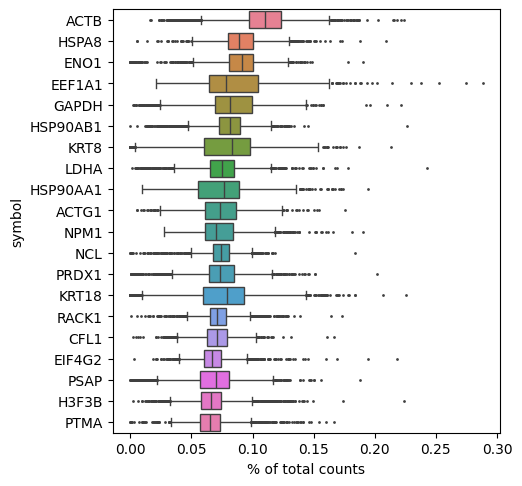

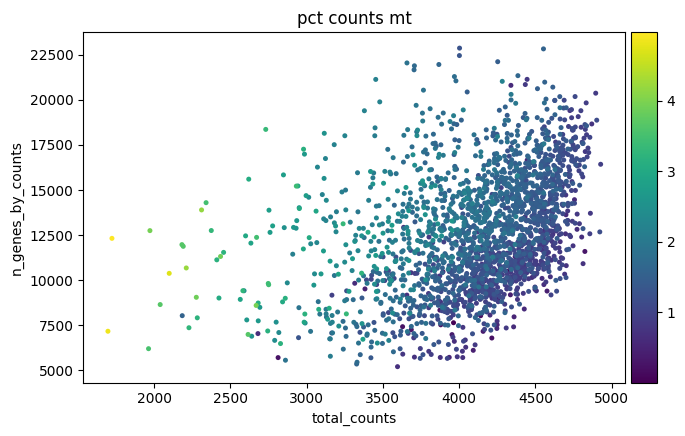

In [28]:
# Recheck after mt filtering
sc.pl.highest_expr_genes(adata, n_top=20, show= False)
plt.savefig('Fig/Proks_top_genes_QC.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [29]:
adata

AnnData object with n_obs × n_vars = 2314 × 51343
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_status'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

In [30]:
adata.write_h5ad('adata._human.h5ad')

In [ ]:
# Basic loading
#adata = sc.read_h5ad('adata._human.h5ad.h5ad')

In [ ]:
# Store different processing steps in layers
#adata.layers['counts'] = adata.X.copy()  # Original counts

# Data integration

In [31]:
np.random.seed(42)  # Optional: set seed for reproducibility

In [32]:
# We will make acopy of data to integrate and preserve the original data to be used with GenKI to avoid conflict
# For example, integration requires direct normalization of data; while GenKI requires the normalized data to be in a separate layer
adata.int = adata.copy()
adata.int

AnnData object with n_obs × n_vars = 2314 × 51343
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_status'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

In [33]:
# Normalize and log transform
sc.pp.normalize_total(adata.int, target_sum=1e4)
sc.pp.log1p(adata.int)

In [34]:
adata.int

AnnData object with n_obs × n_vars = 2314 × 51343
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_status'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [35]:
# Scale and PCA
#sc.pp.scale(adata.int) # Optional step here
sc.tl.pca(adata.int, n_comps=50, svd_solver='arpack')

In [36]:
# USe harmony for data integration
harmony_out = hm.run_harmony(adata.int.obsm['X_pca'], adata.int.obs, 
                           vars_use=['batch'], max_iter_harmony=20)
adata.int.obsm['X_pca_harmony'] = harmony_out.Z_corr.T

2025-07-18 14:00:00,300 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-18 14:00:02,178 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-18 14:00:02,204 - harmonypy - INFO - Iteration 1 of 20
2025-07-18 14:00:03,150 - harmonypy - INFO - Iteration 2 of 20
2025-07-18 14:00:03,959 - harmonypy - INFO - Iteration 3 of 20
2025-07-18 14:00:04,891 - harmonypy - INFO - Iteration 4 of 20
2025-07-18 14:00:05,865 - harmonypy - INFO - Iteration 5 of 20
2025-07-18 14:00:06,753 - harmonypy - INFO - Iteration 6 of 20
2025-07-18 14:00:07,432 - harmonypy - INFO - Iteration 7 of 20
2025-07-18 14:00:07,978 - harmonypy - INFO - Iteration 8 of 20
2025-07-18 14:00:08,827 - harmonypy - INFO - Iteration 9 of 20
2025-07-18 14:00:09,522 - harmonypy - INFO - Iteration 10 of 20
2025-07-18 14:00:10,103 - harmonypy - INFO - Iteration 11 of 20
2025-07-18 14:00:10,941 - harmonypy - INFO - Converged after 11 iterations


In [37]:
# Neighbors and UMAP on harmony coordinates
sc.pp.neighbors(adata.int, use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(adata.int)
#sc.tl.leiden(adata, resolution=0.5)

2025-07-18 14:00:34.149529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-18 14:00:38.166419: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-07-18 14:00:38.166627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [38]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata.int, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

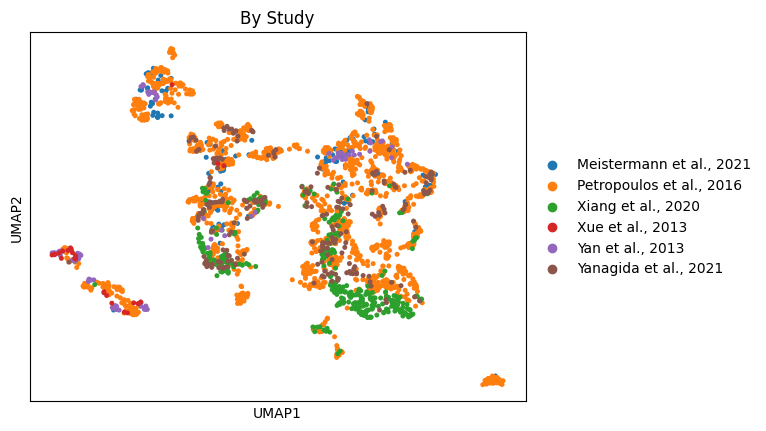

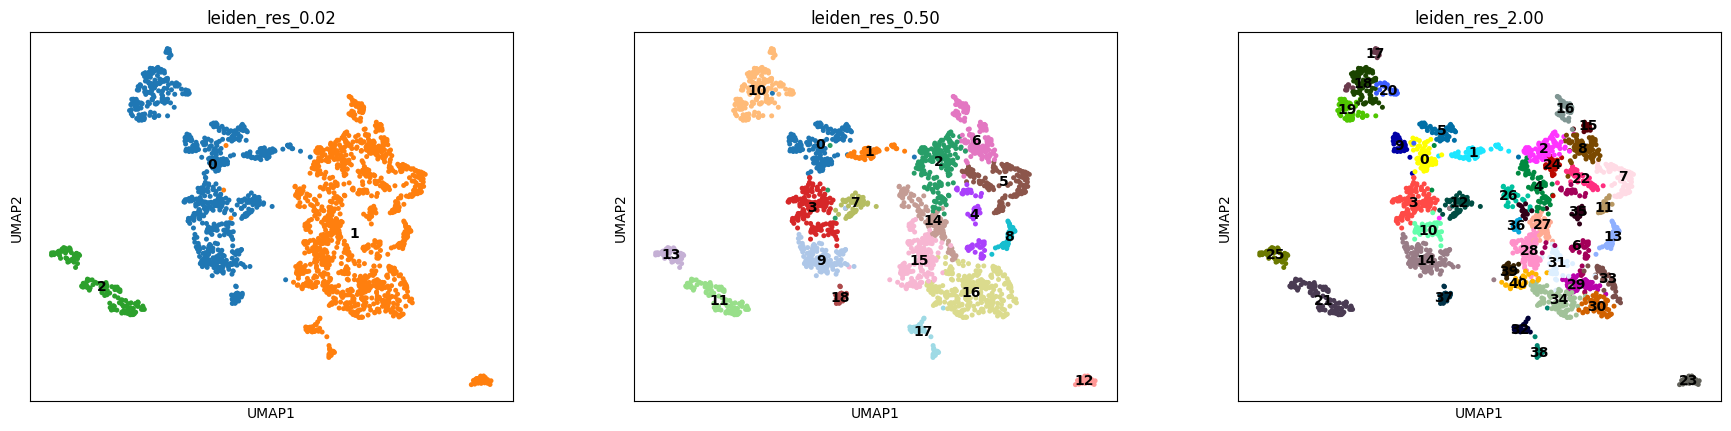

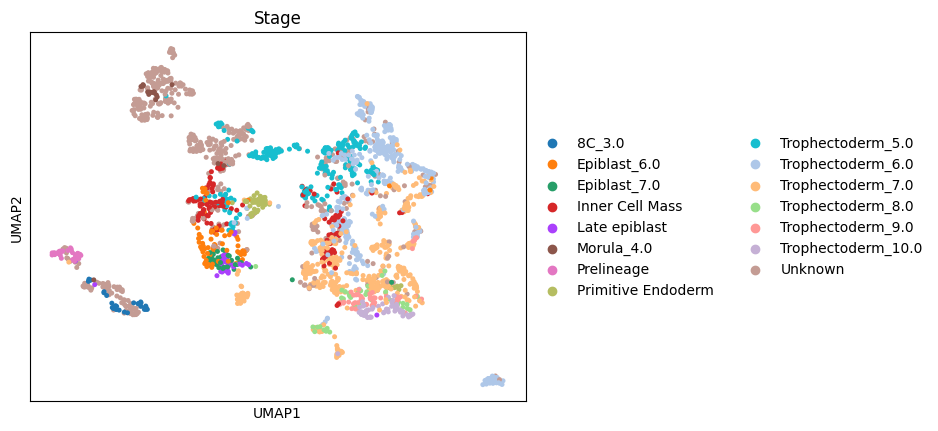

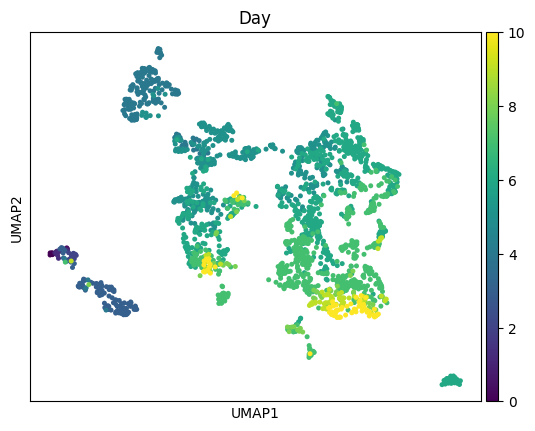

In [40]:
# Plot results
sc.pl.umap(adata.int, color='batch', title='By Study')

sc.pl.umap(
    adata.int,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data")

#sc.pl.umap(adata, color='leiden', title='Clusters')
sc.pl.umap(adata.int, color='ct_fine', title='Stage')
sc.pl.umap(adata.int, color='day', title='Day')

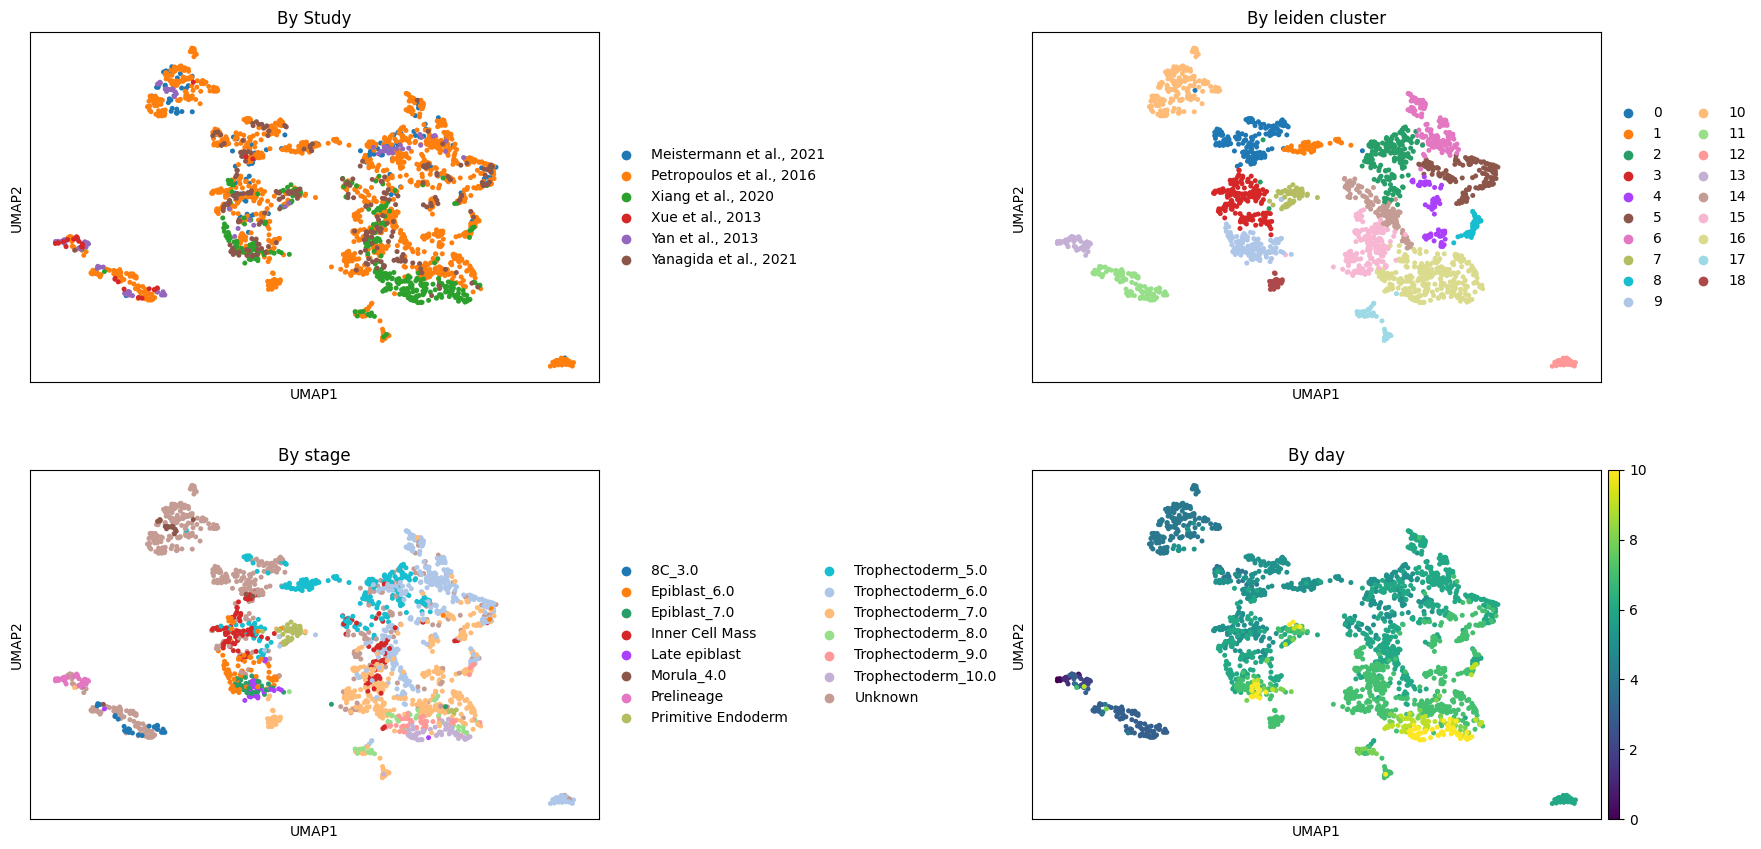

In [68]:
# Print figures
sc.pl.umap(adata.int, color=['batch','leiden_res_0.50' , 'ct_fine','day' ],
           title=['By Study', 'By leiden cluster', 'By stage', 'By day'],
            ncols= 2,
            wspace=0.6,
          show= False)
          
plt.savefig('Fig/Proks_clusters.png', dpi=300, bbox_inches='tight',
            facecolor='white')
plt.show()

In [54]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata.int, groupby="leiden_res_0.50", method="wilcoxon")

In [55]:
# Marker genes
marker_genes =  {
     "Trophectoderm":
    ["GATA2", "TEAD3", "FABP3", "PPARG", "PLAC8", "CDX2", "DLX3", "HAND1", "SMAD7", "WNT7A"],
    
     "Epiblast":
    ["ETS2", "POU5F1", "SOX2", "VENTX", "NANOG", "KLF17", "DPPA5", 
    "ETV4", "TDGF1", "GSC", "TP53", "TET1", "TET2", "IFITM1"],
    
    "Primitive Endoderm":
    ["RSPO3", "COL4A2", "GATA4", "LAMA2", "COL4A1", "SOX17", "GATA6", "FOXA2", "BMP6"],
    
     "Others":
    ["CTNNB1", "CDH1", "SPARC", "PAX6", "TGFBR1", "HHEX"]
}

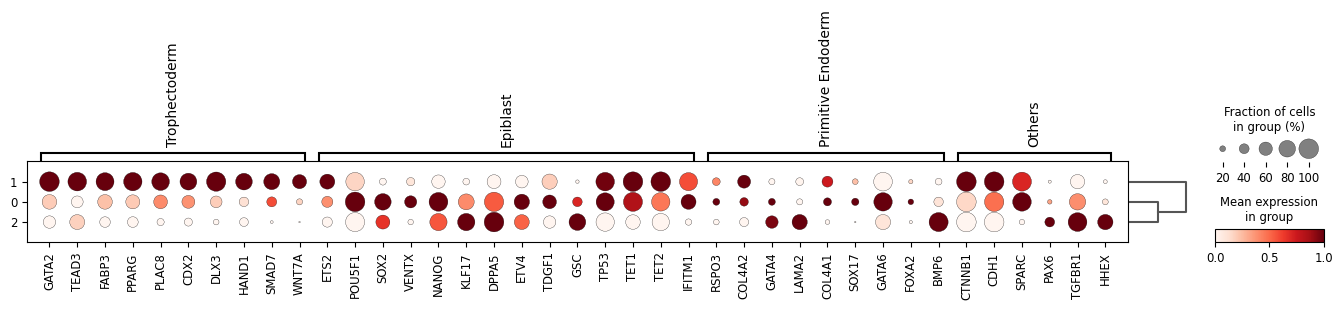

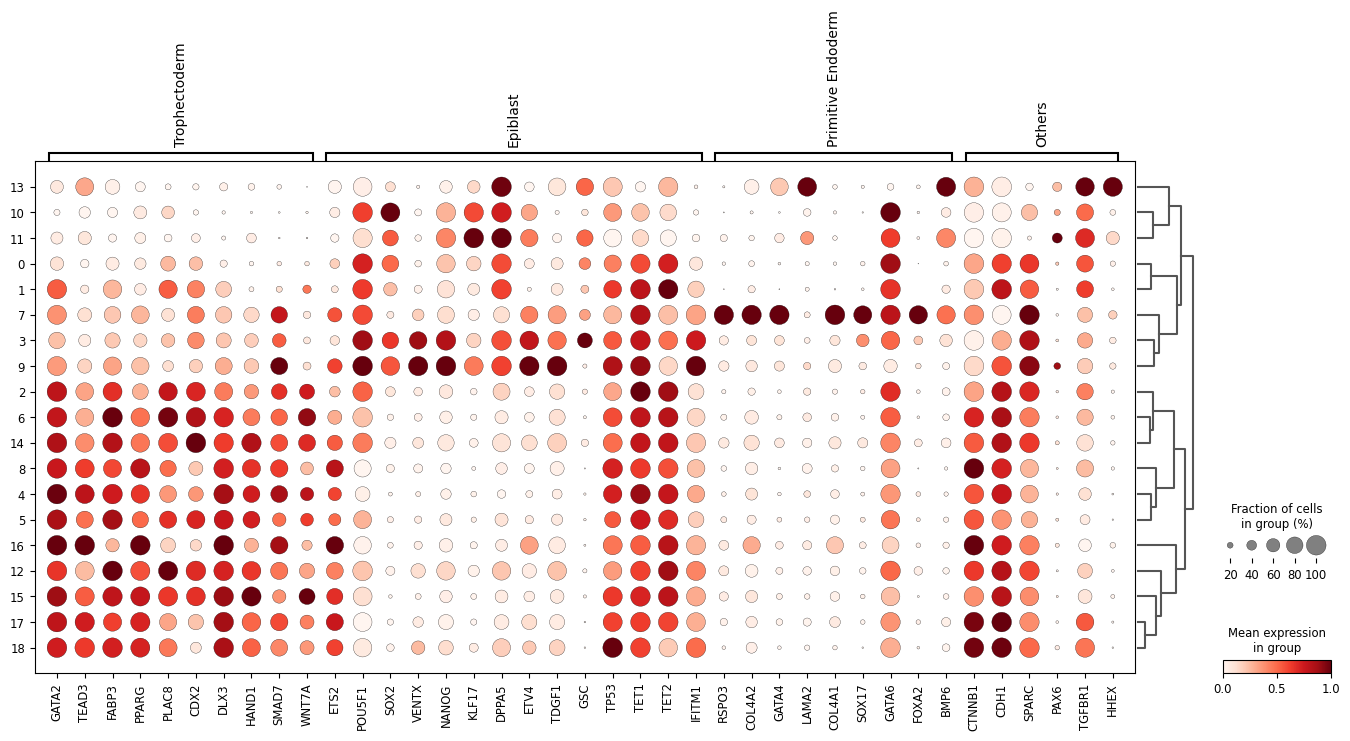

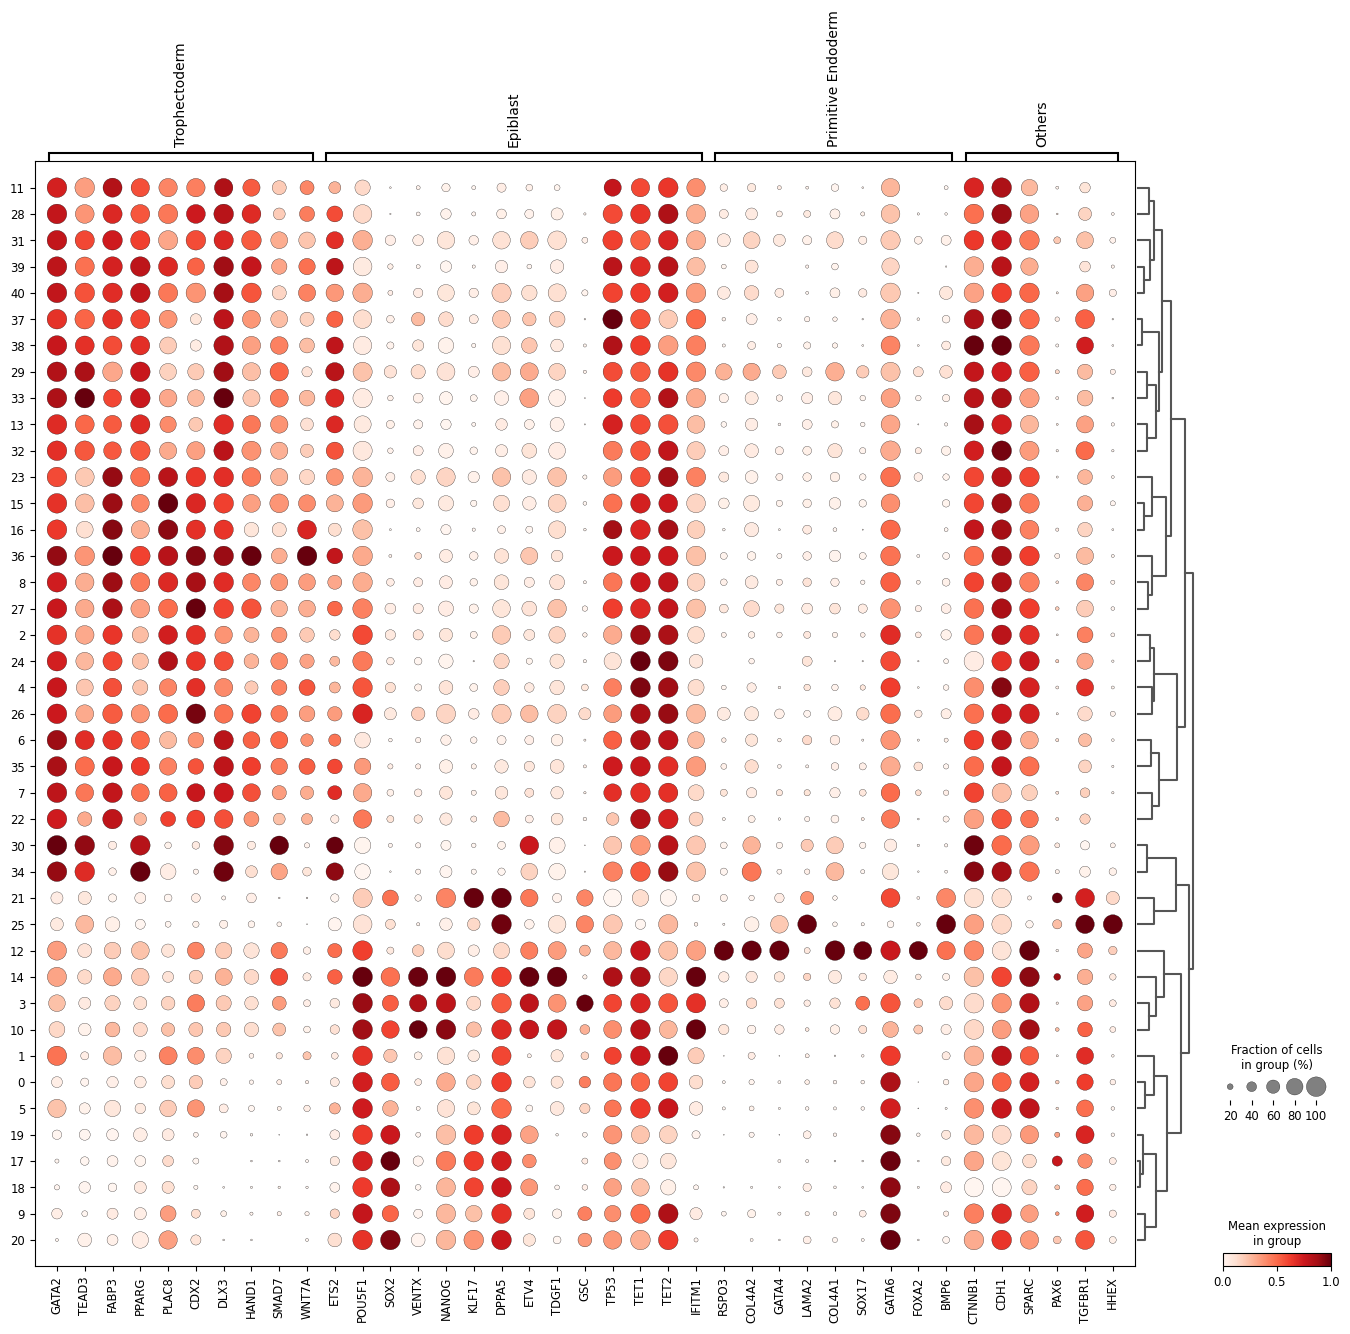

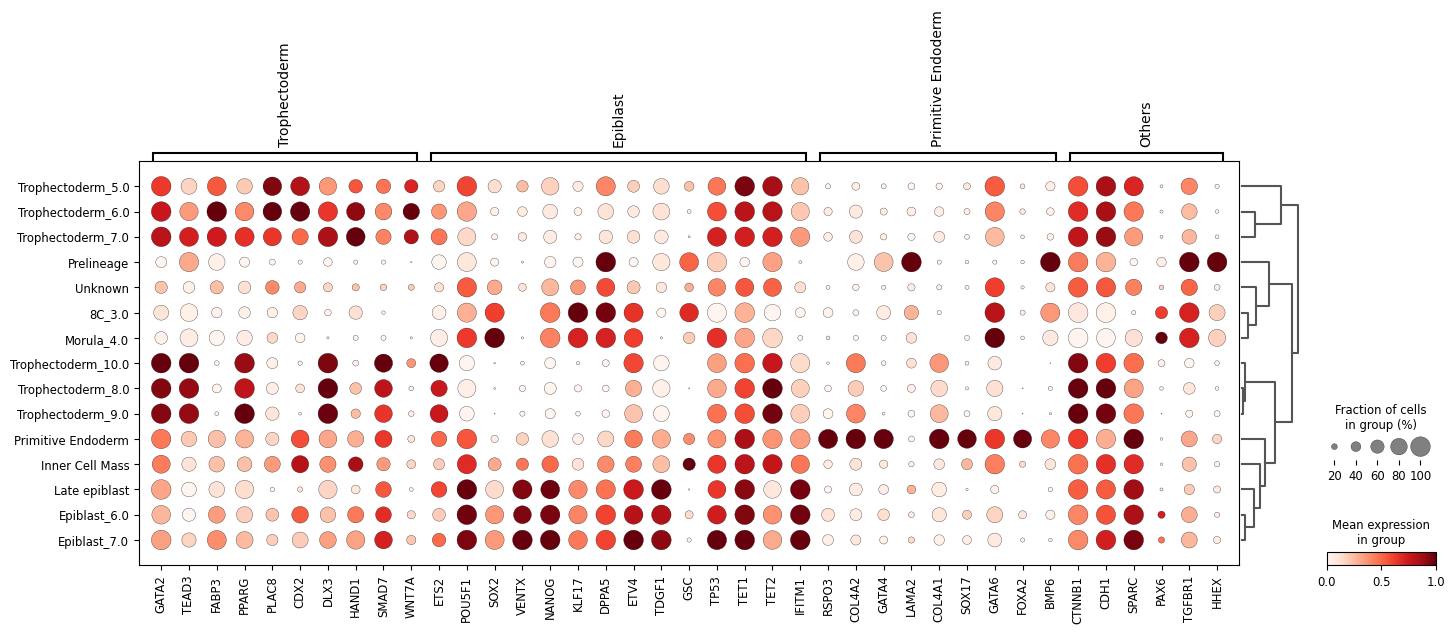

In [73]:
# plot gene expression of marker genes by leiden classes and stage
# This help us to select a cluster of cells with strong expression of the target gene (e.g. POU5F1) as well as related marker genes
# We can also make sure each cell category/ embryo stage shows strong expression of its marker genes reported in the literature
sc.pl.rank_genes_groups_dotplot(
    adata.int, var_names= marker_genes, groupby=["leiden_res_0.02"], standard_scale="var",
    use_raw= False
)

sc.pl.rank_genes_groups_dotplot(
    adata.int, var_names= marker_genes, groupby=["leiden_res_0.50"], standard_scale="var",
    use_raw= False, show= False
)
plt.savefig('Fig/Proks_dotplot_leiden.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

sc.pl.rank_genes_groups_dotplot(
    adata.int, var_names= marker_genes, groupby=["leiden_res_2.00"], standard_scale="var",
    use_raw= False, show= False
)

sc.pl.rank_genes_groups_dotplot(
    adata.int, var_names= marker_genes, groupby=["ct_fine"], standard_scale="var",
    use_raw= False, show= False
)
plt.savefig('Fig/Proks_dotplot_stage.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [58]:
#adata.int.write_h5ad('adata.int_human.h5ad')

In [57]:
# Basic loading
adata.int = sc.read_h5ad('adata.int_human.h5ad')
adata.int

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'adata.int_human.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

#  Cells selection for GenKI

In [ ]:
# We will try to select a cluster of cells that shows strong expression of our target gene as well as related marker genes
# This helps to reduce computational power required for GenKI by reducing the number of included cells
# This also helps to focus more on cells of greater interest (e.g. epiblast)

In [38]:
display(adata.int.obs.head(100))

day       ct                experiment technology   n_counts  n_genes  ct_fine                     batch    stage timepoint  ct_orig  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  log1p_total_counts  pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  log1p_total_counts_hb  pct_counts_hb mt_status leiden_res_0.02 leiden_res_0.50 leiden_res_2.00
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
ERX3015937_ERX3015937  5.0  Unknown  Meistermann et al., 2021  SMARTSeq2   708313.0     5507  Unknown  Meistermann et al., 2021  Unknown      E5.0  Unknown               5761                 8.659040   3155.507812            8.057221                    5.470847                     9.259490                    15.683457                    30.901817        65.274261               4.193801       2.068582         157.620209                 5.066513         4.995082         0.027845               0.027464       0.000882       Low               0               0               0
ERX3015939_ERX3015939  5.0  Unknown  Meistermann et al., 2021  SMARTSeq2   402557.0     5480  Unknown  Meistermann et al., 2021  Unknown      E5.0  Unknown               5689                 8.646466   4023.474365            8.300150                    4.132565                     7.480032                    13.279796                    27.648802        28.737438               3.392407       0.714244         163.875870                 5.105193         4.072994         1.219282               0.797184       0.030304       Low               0               0               0
ERX3015940_ERX3015940  5.0  Unknown  Meistermann et al., 2021  SMARTSeq2   511338.0     5784  Unknown  Meistermann et al., 2021  Unknown      E5.0  Unknown               6039                 8.706159   4021.239258            8.299594                    4.163235                     7.573131                    13.484921                    27.671856        31.237391               3.473127       0.776810         194.504517                 5.275583         4.836930         0.038368               0.037650       0.000954       Low               0               0               0
ERX3015941_ERX3015941  5.0  Unknown  Meistermann et al., 2021  SMARTSeq2   994383.0     8079  Unknown  Meistermann et al., 2021  Unknown      E5.0  Unknown               8383                 9.034080   4426.896973            8.395680                    3.708178                     6.697449                    11.868089                    24.322931        26.416973               3.311162       0.596738         171.078384                 5.147950         3.864522         0.685889               0.522293       0.015494       Low               0               0               0
ERX3015936_ERX3015936  5.0  Unknown  Meistermann et al., 2021  SMARTSeq2  1389486.0     7462  Unknown  Meistermann et al., 2021  Unknown      E5.0  Unknown               7762                 8.957124   3523.766357            8.167569                    4.802285                     8.178745                    13.927121                    27.215458        60.440937               4.118076       1.715237         146.731918                 4.995399         4.164065         0.680576               0.519137       0.019314       Low               0          

In [71]:
adata_leiden = adata.int[adata.int.obs["leiden_res_0.50"] == "9"]

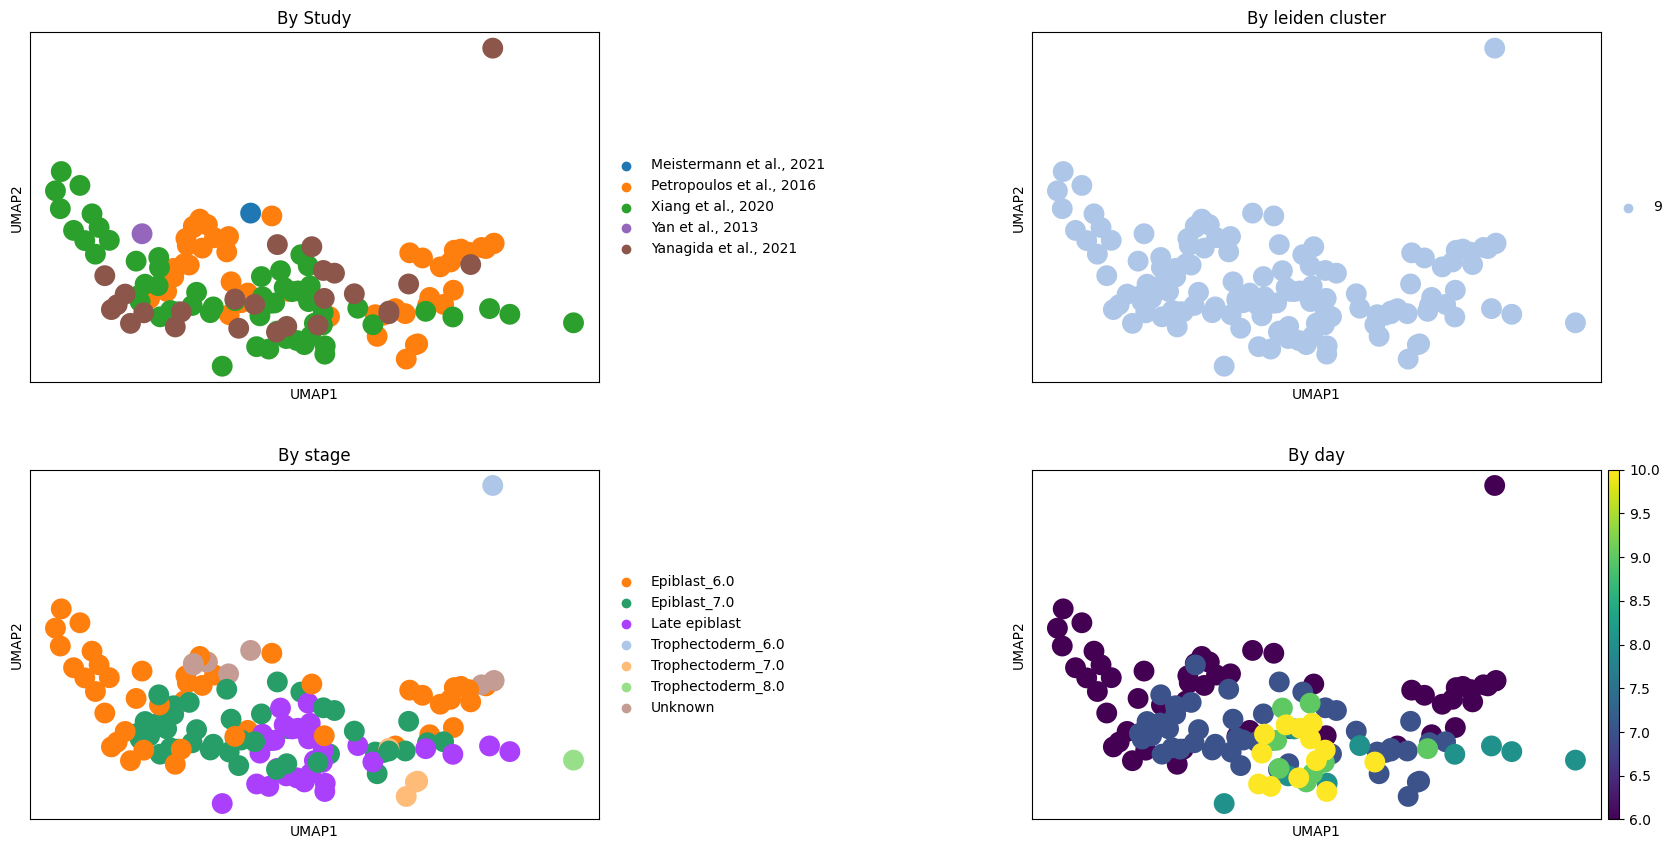

In [72]:
sc.pl.umap(adata_leiden, color=['batch','leiden_res_0.50' , 'ct_fine','day' ],
           title=['By Study', 'By leiden cluster', 'By stage', 'By day'],
            ncols= 2,
            wspace=0.6,
          show= False)
          
plt.savefig('Fig/Proks_filtered_clusters.png', dpi=300, bbox_inches='tight',
            facecolor='white')
plt.show()

In [70]:
adata_leiden.obs.head(10)

day            ct                experiment technology   n_counts  n_genes       ct_fine                     batch    stage timepoint   ct_orig  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  log1p_total_counts  pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  log1p_total_counts_hb  pct_counts_hb mt_status leiden_res_0.02 leiden_res_0.50 leiden_res_2.00
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
ERX3016019_ERX3016019  6.0       Unknown  Meistermann et al., 2021  SMARTSeq2   195717.0     7353       Unknown  Meistermann et al., 2021  Unknown      E6.0   Unknown               7537                 8.927712   3323.518799            8.109080                    4.563703                     7.731934                    13.178481                    25.813861        54.175282               4.010515       1.630058         131.492004                 4.886522         3.956409         0.342705               0.294686       0.010312       Low               0               9              14
ERX1121492_ERX1121492  6.0  Epiblast_6.0  Petropoulos et al., 2016  SMARTSeq2  4078001.0    12855  Epiblast_6.0  Petropoulos et al., 2016      EPI      E6.0  Epiblast              13327                 9.497622   4523.180176            8.417192                    3.708805                     6.597529                    11.456589                    22.842141        59.687645               4.105740       1.319595         179.066757                 5.193328         3.958869         0.399992               0.336466       0.008843       Low               0               9              14
ERX1121494_ERX1121494  6.0  Epiblast_6.0  Petropoulos et al., 2016  SMARTSeq2  1559368.0     9892  Epiblast_6.0  Petropoulos et al., 2016      EPI      E6.0  Epiblast              10191                 9.229358   4430.634766            8.396523                    3.813729                     6.752610                    11.762881                    23.637240        60.110218               4.112679       1.356695         168.962463                 5.135578         3.813505         1.107394               0.745452       0.024994       Low               0               9              14
ERX1121493_ERX1121493  6.0       Unknown  Petropoulos et al., 2016  SMARTSeq2  5544618.0    14195       Unknown  Petropoulos et al., 2016  Unknown      E6.0   Unknown              14734                 9.597981   4639.831055            8.442649                    3.633731                     6.444633                    11.124244                    22.090964        58.584160               4.087390       1.262636         180.814423                 5.202987         3.897005         0.428223               0.356431       0.009229       Low               0               9              14
ERX1121495_ERX1121495  6.0  Epiblast_6.0  Petropoulos et al., 2016  SMARTSeq2  1385815.0    10307  Epiblast_6.0  Petropoulos et al., 2016      EPI      E6.0  Epiblast              10591                 9.267854   3798.547607            8.242638                    4.452741                     7.622565                    12.990712                    25.306228        83.341682               4.434876       2.194041         150.353119                 5.019616         3.958174         0.329

In [52]:
# Find highly variable genes with batch correction
# We would like to include as much marker genes of interest as possible
sc.pp.highly_variable_genes(adata_leiden, n_top_genes=5000, subset=True, 
                           batch_key='batch', flavor='seurat')

/home/jupyter/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:309: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/jupyter/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:693: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  df = _highly_variable_genes_batched(
/home/jupyter/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:309: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/jupyter/.local/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/jupyter/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_nam

In [53]:
adata_leiden

AnnData object with n_obs × n_vars = 133 × 5219
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_status', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'batch_colors', 'ct_fine_colors', 'dendrogram_c

In [54]:
# Check which genes from your list are present
present_genes = [gene for gene in specific_genes if gene in adata_leiden.var_names]

# Get a boolean mask for all your genes
genes_mask = adata_leiden.var_names.isin(specific_genes)

# Get subset of data containing only these genes
adata_subset = adata_leiden[:, genes_mask]

# Print stats
print(f"Found {len(present_genes)} out of {len(specific_genes)} genes")
print(f"Missing genes: {set(specific_genes) - set(present_genes)}")

Found 29 out of 39 genes
Missing genes: {'CTNNB1', 'HHEX', 'VENTX', 'ETS2', 'PPARG', 'TP53', 'LAMA2', 'ETV4', 'CDH1', 'TGFBR1'}


# GenKI KO experiment

In [ ]:
# We will return to the original adata sc object, add a normalization layer, scale it, and
# filter by previously selected genes and cells

# GenKI demands normalization (separate layer) and scaling (of original data)

In [55]:
# This creates a copy and returns it
adata_norm = sc.pp.normalize_total(adata, target_sum=1e4, copy= True)
sc.pp.log1p(adata_norm)  # Modify in place (default behavior)

# Save normalized data to original object's layer
adata.layers['norm'] = adata_norm.X.copy()

# Original adata is preserved

In [56]:
# Let's check how original counts looks
adata.layers['counts']

<2314x51343 sparse matrix of type '<class 'numpy.float32'>'
	with 28345398 stored elements in Compressed Sparse Row format>

In [57]:
# Let's check how normalized counts looks
# the 'norm' layer should be a sparse matrix as the 'counts' layer
adata.layers['norm']

<2314x51343 sparse matrix of type '<class 'numpy.float32'>'
	with 28345398 stored elements in Compressed Sparse Row format>

In [58]:
sc.pp.scale(adata)

/opt/conda/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [59]:
# Filter adata to include only cells AND genes that was previously selected
common_cells = adata.obs_names.intersection(adata_leiden.obs_names)
common_genes = adata.var_names.intersection(adata_leiden.var_names)

In [60]:
adata_filtered = adata[common_cells, common_genes]
adata_filtered

View of AnnData object with n_obs × n_vars = 133 × 4988
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_status'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mean', 'std'
    layers: 'counts', 'norm'

In [61]:
# Save to HDF5 format
adata_filtered.write_h5ad('adata_filtered_human.h5ad')

In [ ]:
# Basic loading
#adata = sc.read_h5ad('adata_filtered_human.h5ad')

In [62]:
# load data
data_wrapper =  DataLoader(
                adata_filtered, # adata object
                target_gene = ["POU5F1"], # KO gene name
                target_cell = None, # obsname for cell type, if none use all
                obs_label = "ident", # colname for genes
                GRN_file_dir = "GRNs", # folder name for GRNs
                rebuild_GRN = True, # whether build GRN by pcNet # Switch between load & save
                pcNet_name = "pcNet_human_1", # GRN file name
                verbose = True, # whether verbose
                n_cpus = 8, # multiprocessing
                )

data_wt = data_wrapper.load_data()
data_ko = data_wrapper.load_kodata()

use all the cells (133) in adata
build GRN


2025-07-09 21:32:17,060	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


ray init, using 8 CPUs
execution time of making pcNet: 492.71 s
GRN has been built and saved in "GRNs/pcNet_human_1.npz"
init completed



In [63]:
# init trainer

hyperparams = {"epochs": 100, 
               "lr": 7e-4, 
               "beta": 1e-4, 
               "seed": 8096}
log_dir=None 

sensei = VGAE_trainer(data_wt, 
                     epochs=hyperparams["epochs"], 
                     lr=hyperparams["lr"], 
                     log_dir=log_dir, 
                     beta=hyperparams["beta"],
                     seed=hyperparams["seed"],
                     verbose=False,
                     )

New heading

In [64]:
#%%timeit
sensei.train()

In [65]:
sensei.save_model('model')

save model parameters to model/model.th


In [ ]:
#sensei.load_model('model')

In [66]:
# get distance between wt and ko

z_mu_wt, z_std_wt = sensei.get_latent_vars(data_wt)
z_mu_ko, z_std_ko = sensei.get_latent_vars(data_ko)
dis = gk.utils.get_distance(z_mu_ko, z_std_ko, z_mu_wt, z_std_wt, by="KL")
print(dis.shape)

(4988,)


In [67]:
# raw ranked gene list

res_raw = utils.get_generank(data_wt, dis, rank=True)
res_raw.head()

dis  rank
POU5F1        0.000277     1
ZNF839        0.000161     2
RP11-287D1.2  0.000060     3
ALX1          0.000011     4
PTGES         0.000003     5

In [68]:
res_raw.to_csv("Output/geneKi_human_list 10.7.2025.csv")

In [69]:
# if permutation test
null = sensei.pmt(data_ko, n=100, by="KL")
res = utils.get_generank(data_wt, dis, null,)
#                       save_significant_as = 'gene_list_example')
res

Permutating: 100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


dis  index  hit  rank
POU5F1  2.772445e-04   1744  100     1
ZNF839  1.613026e-04   3605   96     2
PTGES   3.471575e-06   2545  100     3
FABP3   3.382993e-06     10  100     4
LRP2    3.313942e-06    575  100     5
...              ...    ...  ...   ...
SFXN1   1.537234e-07   1396   96   102
CNDP2   1.450266e-07   4333   97   103
PLK1    1.331091e-07   3909   96   104
IER2    1.289039e-07   4630   96   105
PLIN2   1.011579e-07   2542   95   106

[106 rows x 4 columns]

In [71]:
res.to_csv("Output/geneKi_human_per 10.7.2025.csv")